In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [6]:
os.listdir("Datasources/inside_airbnb") 

['neighbourhoods.geo.json',
 'reviews.csv',
 '.DS_Store',
 'neighbourhoods.geojson',
 'listings_summ.csv',
 'neighbourhoods.csv',
 'stations.geojson',
 'listings.csv',
 'calendar.csv',
 'reviews_summ.csv',
 'neighbourhoods.json']

In [12]:
listings = pd.read_csv('inside_airbnb/listings.csv')
list_summ = pd.read_csv('inside_airbnb/listings_summ.csv')
#neighborhoods = pd.read_csv('inside_airbnb/neighbourhoods.csv')
reviews = pd.read_csv('inside_airbnb/reviews.csv')
#reviews_summ = pd.read_csv('inside_airbnb/reviews_summ.csv')
calendar = pd.read_csv('inside_airbnb/calendar.csv')

Listings Analysis

In [8]:
listings.columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'access',
       u'interaction', u'house_rules', u'thumbnail_url', u'medium_url',
       u'picture_url', u'xl_picture_url', u'host_id', u'host_url',
       u'host_name', u'host_since', u'host_location', u'host_about',
       u'host_response_time', u'host_response_rate', u'host_acceptance_rate',
       u'host_is_superhost', u'host_thumbnail_url', u'host_picture_url',
       u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'prope

In [27]:
list_summ.info

<bound method DataFrame.info of             id                                               name   host_id  \
0     11204286                    Family friendly/California king  56227310   
1      7972006                            Welcome to Sunset Suite  42066439   
2      7727710                San Diego/Eastlake. Gated community  40606235   
3     13124681                               Townhome in Eastlake  66918996   
4      3469225                    Bedroom suite in Large new home   4636507   
5       877473                      Private Bedroom in Newer Home   4636507   
6      3124507                Great view to mountains,lake,trails  15870464   
7      3432507                        2 bedrooms with shared bath  15870464   
8      3249729                    Near to Olympic Training center  15870464   
9     11756336                      Chula Vista Golf Course House  39158621   
10    12173670                      Eastlake Green room available  65401645   
11    13157364      

In [5]:
listings = listings.loc[(listings.zipcode==92101) & (listings.room_type == 'Entire home/apt')]

In [7]:
list_summ = pd.read_csv('inside_airbnb/listings_summ.csv')

In [12]:
#Finding Most Active Listings
l_summ = list_summ.copy()

In [15]:
tier1 = l_summ.loc[(l_summ.availability_365>0)&(l_summ.availability_365<73)]
tier2 = l_summ.loc[(l_summ.availability_365>72)&(l_summ.availability_365<146)]
tier3 = l_summ.loc[(l_summ.availability_365>145)&(l_summ.availability_365<219)]
tier4 = l_summ.loc[(l_summ.availability_365>218)&(l_summ.availability_365<292)]
tier5 = l_summ.loc[(l_summ.availability_365>291)&(l_summ.availability_365<365)]

In [36]:
avail_lt250 = l_summ.loc[l_summ['availability_365']<250][['id','availability_365']]

In [37]:
avail_lt250.head(15)

,id,availability_365
1,7972006,80
2,7727710,0
10,12173670,0
13,10687910,174
17,5285136,186
21,7113838,37
24,4997701,179
25,6098460,76
27,10284248,0
35,6055788,0


Calendar Analysis

In [54]:
cal = calendar.copy()

In [55]:
cal.columns

Index([u'listing_id', u'date', u'available', u'price'], dtype='object')

In [57]:
cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [60]:
cal['price'] = cal['price'].astype(str).map(lambda x: x.lstrip('$'))

In [63]:
#Transform Price from Object to Numeric Data Type
cal['price'] = cal['price'].apply(pd.to_numeric, errors='coerce')

In [64]:
cal['price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [65]:
cal.head(10)

,listing_id,date,available,price
0,11204286,2017-07-05,t,49.0
1,11204286,2017-07-04,t,49.0
2,11204286,2017-07-03,t,49.0
3,11204286,2017-07-02,t,49.0
4,11204286,2017-07-01,t,49.0
5,11204286,2017-06-30,t,49.0
6,11204286,2017-06-29,t,49.0
7,11204286,2017-06-28,t,49.0
8,11204286,2017-06-27,t,49.0
9,11204286,2017-06-26,t,49.0


In [66]:
def group_mean(x):
    x['mean_price'] = x['price'].mean()
    return x

In [67]:
fr = cal.groupby(calendar.listing_id).apply(group_mean)

In [68]:
fr = fr.loc[fr.available!='t']

In [69]:
frame = fr[['listing_id','mean_price']].groupby(['listing_id']).sum()

New DF Joining 92101 Listings with Respective Calendar Entries

In [70]:
merged = listings.merge(frame, how='inner', left_on='id', right_index=True)

In [71]:
merged.rename(columns={'mean_price':'estimated_tot_income'}, inplace=True)

In [72]:
merged['estimated_tot_income'] = merged['estimated_tot_income'].apply(lambda x: x*0.75)

In [73]:
cols = ['id','bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'estimated_tot_income']

In [75]:
merged[cols].sort_values(['estimated_tot_income'], ascending=False).head(3)

,id,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,estimated_tot_income
4141,13172900,3.0,4.0,7.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,265072.50
2298,13413132,4.0,4.0,4.0,Real Bed,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,235575.00
2091,13329433,2.0,4.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Pool,Kitchen,""Free Par...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,233655.75


In [76]:
cal.loc[(cal.listing_id == 6275771) & (cal.available!='t')].count()

listing_id    360
date          360
available     360
price           0
dtype: int64

Merging Selection of Unavailable (lt250 days) Listings with their calendars

In [78]:
new = avail_lt250.merge(cal ,how='inner', left_on='id', right_on='listing_id')

In [79]:
new.sort_values(by='id').head(3)

,id,availability_365,listing_id,date,available,price
776173,6,42,6,2017-06-28,f,NaN
776106,6,42,6,2016-12-21,f,NaN
776107,6,42,6,2016-12-20,f,NaN


In [87]:
new_id6 = new.loc[(new.id == 6)]

Plotting values for this listing id

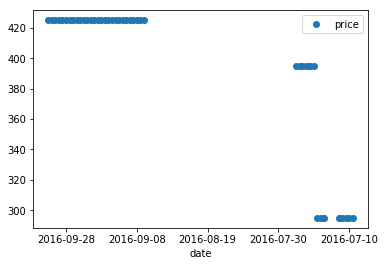

In [88]:
new_id6.plot(x='date', y='price', style='o')
plt.show()

In [90]:
new_id6.loc[(new_id6.price)>0].count()

id                  42
availability_365    42
listing_id          42
date                42
available           42
price               42
dtype: int64

In [ ]:
#Will look for listings that have high occupancy rates but also lots of vacant days in between so we can figure out price patterns